# INF 552: Machine Learning for Data Informatics 

## Homework 2

### Jungho Choi (junghoch@usc.edu) 

1.Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.

(a) Download the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

In [190]:
%matplotlib inline  
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.table import Table 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

# read in the data using pandas
ccpp_data = pd.read_excel('/Users/choi/usc/inf552/hw2/CCPP/Folds5x2_pp.xlsx')
ccpp_data.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


(b) Exploring the data:

    i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [71]:
rows = len(ccpp_data)
columns = len(ccpp_data.columns)
print(str(rows) + " rows in the CCPP Data Set")
print(str(columns) + " columns in the CCPP Data Set")
print("")
print("Each row represents an instance of the data set. In other words, it is a single observation from an experiment.")
print("Each column represents a feature (aka independent variable) of the data set, except for the last column which is the target variable--the thing we are trying to predict. The first 4 columns are the features and the last column is the output variable (aka dependent variable).")

9568 rows in the CCPP Data Set
5 columns in the CCPP Data Set

Each row represents an instance of the data set. In other words, it is a single observation from an experiment.
Each column represents a feature (aka independent variable) of the data set, except for the last column which is the target variable--the thing we are trying to predict. The first 4 columns are the features and the last column is the output variable (aka dependent variable).


    ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

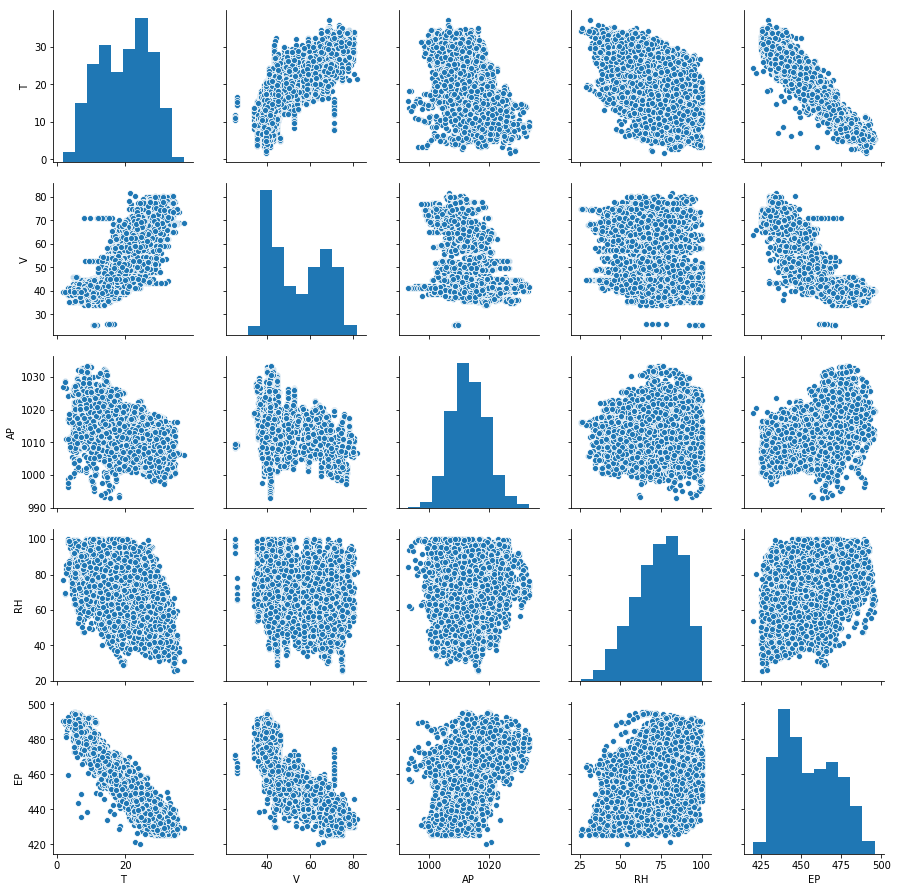

In [72]:
sns.pairplot(ccpp_data)
plt.show()

1) Indepedent Variables (predictors) vs. Dependent Variable (Last Row of the Pairplot): 
    - Electrical Energy (EP) vs. Temperature (T): strong inverse linear relationship 
    - Electrical Energy (EP) vs.  Exhuast Vacuum (V): some inverse relationship (linear or exponential decay)
    - Electrical Energy (EP) vs. Ambient Pressure (AP): little to no evidnce of a relationship between two variables   (maybe very weak positive linear) 
    - Electrical Energy (EP) vs. Relative Humidity (RH): little to no evidence of a relationship between two varaibles (maybe very weak positive linear)

2) Dependent Variables vs. Depedent Variables: 
    - Ambient Pressure (AP) vs. Temperature (T) : weak negative linear relationship or almost no relationship 
    - Ambient Pressure (AP) vs. Exhaust Vacuum (V): weak negative linear relationship or almost no relationship 
    - Ambient Pressure (AP) vs. Relative Humidity (RH): little to no evidence of a relationship 
    - Exhuast Vacuum (V) vs Temperature (T): positive relationship (linear or exponential. More likely exp.) 
    - Exhuast Vacuum (V) vs. Relative Humidity (RH): little to no evidnce of a relationship 
    - Relative Humidity (RH) vs. Temperature (T): weak negative linear relationship or almost no relationship

    iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [73]:
t_mean = np.mean(ccpp_data['T'])
t_median = np.median(ccpp_data['T'])
t_range = max(ccpp_data['T']) - min(ccpp_data['T'])
t_firstq = np.percentile(ccpp_data['T'], 25)
t_thirdq = np.percentile(ccpp_data['T'], 75)
t_interq_range = t_thirdq - t_firstq

v_mean = np.mean(ccpp_data['V'])
v_median = np.median(ccpp_data['V'])
v_range = max(ccpp_data['V']) - min(ccpp_data['V'])
v_firstq = np.percentile(ccpp_data['V'], 25)
v_thirdq = np.percentile(ccpp_data['V'], 75)
v_interq_range = v_thirdq - v_firstq

ap_mean = np.mean(ccpp_data['AP'])
ap_median = np.median(ccpp_data['AP'])
ap_range = max(ccpp_data['AP']) - min(ccpp_data['AP'])
ap_firstq = np.percentile(ccpp_data['AP'], 25)
ap_thirdq = np.percentile(ccpp_data['AP'], 75)
ap_interq_range = ap_thirdq - ap_firstq

rh_mean = np.mean(ccpp_data['RH'])
rh_median = np.median(ccpp_data['RH'])
rh_range = max(ccpp_data['RH']) - min(ccpp_data['RH'])
rh_firstq = np.percentile(ccpp_data['RH'], 25)
rh_thirdq = np.percentile(ccpp_data['RH'], 75)
rh_interq_range = rh_thirdq - rh_firstq

ep_mean = np.mean(ccpp_data['EP'])
ep_median = np.median(ccpp_data['EP'])
ep_range = max(ccpp_data['EP']) - min(ccpp_data['EP'])
ep_firstq = np.percentile(ccpp_data['EP'], 25)
ep_thirdq = np.percentile(ccpp_data['EP'], 75)
ep_interq_range = ep_thirdq - ep_firstq

variable_list = ['Temperature (T)', 'Ambient Pressure (AP)', 'Relative Humidity (RH)', 'Exhaust Vacuum (V)', 'Electrical Energy Output (EP)']
mean_list = [t_mean, ap_mean, rh_mean, v_mean, ep_mean]
median_list = [t_median, ap_median, rh_median, v_median, ep_median]
range_list = [t_range, ap_range, rh_range, v_range, ep_range]
firstq_list = [t_firstq, ap_firstq, rh_firstq, v_firstq, ep_firstq]
thirdq_list = [t_thirdq, ap_thirdq, rh_thirdq, v_thirdq, ep_thirdq]
interq_range_list = [t_interq_range, ap_interq_range, rh_interq_range, v_interq_range, ep_interq_range]

t = Table([variable_list, mean_list, median_list, range_list, firstq_list, thirdq_list, interq_range_list], names=['Variable', 'Mean', 'Median', 'Range', 'First Quartile', 'Third Quartile', 'Interquartile Range'])
t['Mean'].format = '%.2f'
t['Median'].format = '%.2f'
t['Range'].format = '%.2f'
t['First Quartile'].format = '%.2f'
t['Third Quartile'].format = '%.2f'
t['Interquartile Range'].format = '%.2f'
t

Variable,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
str29,float64,float64,float64,float64,float64,float64
Temperature (T),19.65,20.34,35.30,13.51,25.72,12.21
Ambient Pressure (AP),1013.26,1012.94,40.41,1009.10,1017.26,8.16
Relative Humidity (RH),73.31,74.97,74.60,63.33,84.83,21.50
Exhaust Vacuum (V),54.31,52.08,56.20,41.74,66.54,24.80
Electrical Energy Output (EP),454.37,451.55,75.50,439.75,468.43,28.68


(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [66]:
# Since we are trying to understand and study the data initially for EDA, rather than building a model for prediction, 
# Did not think we need to split the data--train and test set to avoid overfitting 

#dat = sm.datasets.get_rdataset("Guerry", "HistData").data
#results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
#print(results.summary)
ccpp_y = ccpp_data['EP']
ccpp_t = ccpp_data['T']
ccpp_ap = ccpp_data['AP']
ccpp_rh = ccpp_data['RH']
ccpp_v = ccpp_data['V']

t_result= smf.ols('EP ~ T', data = ccpp_data).fit()
ap_result= smf.ols('EP ~ AP', data = ccpp_data).fit()
rh_result= smf.ols('EP ~ RH', data = ccpp_data).fit()
v_result= smf.ols('EP ~ V', data = ccpp_data).fit()

EP vs. T
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:59:07   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280

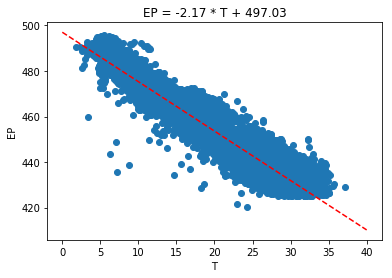

In [68]:
print("EP vs. T")
print(t_result.summary())

plt.scatter(ccpp_t, ccpp_y)
x_plot = np.linspace(0, 40, 5)
plt.plot(x_plot, t_result.params[0] + x_plot * t_result.params[1], 'r--')
plt.xlabel("T")
plt.ylabel("EP")
plt.title("EP = -2.17 * T + 497.03")
plt.show()

Observations for T:
- p-value is less than 0.05, our rejection level, for both intercept and temperature, so we reject the null hypothesis.  
- Conclude it is statistically significant 
- There is high correlation between the two variables as the R^2 value is 0.899, close to 1
- Outliers: No major outliers that seems to deviate the line of fit greatly, but could improve by removing points that are not in the bundle of points 
    

EP vs. AP
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:50:07   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.44

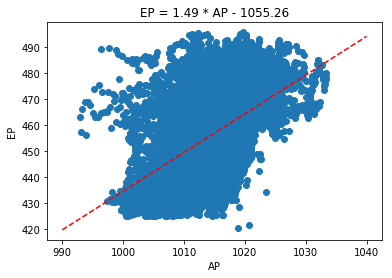

In [61]:
print("EP vs. AP")
print(ap_result.summary())

plt.scatter(ccpp_ap, ccpp_y)
x_plot = np.linspace(990, 1040, 10)
plt.plot(x_plot, ap_result.params[0] + x_plot * ap_result.params[1], 'r--')
plt.xlabel("AP")
plt.ylabel("EP")
plt.title("EP = 1.49 * AP - 1055.26")
plt.show()

Observations for AP:
- p-value is less than 0.05, our rejection level, for both intercept and ambient pressure, so we reject the null hypothesis.  
- Conclude it is statistically significant 
- However, very low R^2 value, which is 0.269, closer to 0 than 1. It might mean that other variables that is affecting the response variable. Harder to model a good relationship compared to Temperature. Precision interval will be bigger
- outliers: No major outliers that seems to deviate the line of fit greatly, but could improve by removing points that are not in the bundle of points 

EP vs. RH
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:55:14   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.67

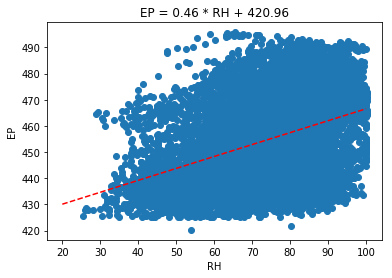

In [64]:
print("EP vs. RH")
print(rh_result.summary())

plt.scatter(ccpp_rh, ccpp_y)
x_plot = np.linspace(20, 100, 10)
plt.plot(x_plot, rh_result.params[0] + x_plot * rh_result.params[1], 'r--')
plt.xlabel("RH")
plt.ylabel("EP")
plt.title("EP = 0.46 * RH + 420.96")
plt.show()

Observations for RH:
- p-value is less than 0.05, our rejection level, for both intercept and relative humidity, so we reject the null hypothesis.  
- Conclude it is statistically significant 
- However, very low R^2 value, which is 0.152, closer to 0 than 1. It might mean that other variables that is affecting the response variable. Harder to model a good relationship compared to Temperature as well. Precision interval will be bigger. 
- outliers: No major outliers that seems to deviate the line of fit greatly, but could improve by removing points that are not in the bundle of points 

EP vs. V
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:57:53   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218

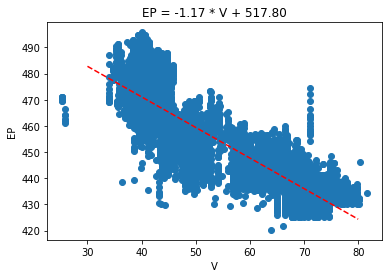

In [65]:
print("EP vs. V")
print(v_result.summary())

plt.scatter(ccpp_v, ccpp_y)
x_plot = np.linspace(30, 80, 10)
plt.plot(x_plot, v_result.params[0] + x_plot * v_result.params[1], 'r--')
plt.xlabel("V")
plt.ylabel("EP")
plt.title("EP = -1.17 * V + 517.80")
plt.show()

Observations for V:
- p-value is less than 0.05, our rejection level, for both intercept and vacuum, so we reject the null hypothesis.  
- Conclude it is statistically significant 
- There is intermediate correlation between the two variables as the R^2 value is 0.757, closer to 1 than 0 but not as strong as Temperature
- outliers: No major outliers that seems to deviate the line of fit greatly, but could improve by removing points that are not in the bundle of points, especially when V is less than 30  (left of the graph) and when V is around 70 and EP is greater than 470 (upper right of the graph). This would need to be checked through through calculations.

(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [75]:
multi_result= smf.ols('EP ~ T + V + AP + RH', data = ccpp_data).fit()
print(multi_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:55:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

Observations for Mutliple Linear Regression:
- p-value is less than 0.05, our rejection level, for both intercept and all independent variables, so we reject the null hypothesis for all.  
- Conclude that every independent variable is statistically significant 
- R^2 value is 0.929 which is close to 1 and shows there is strong correlation. Higher correlation than all the independent variables seperated for simple linear regression. Multiple Linear Regression fits better, overall. 

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

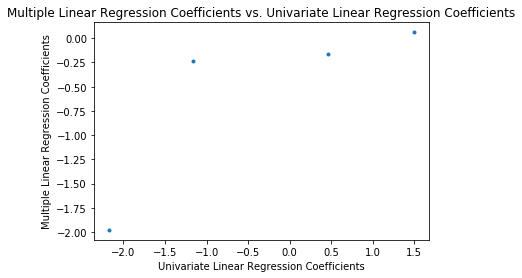

In [84]:
x_univariate = np.array([t_result.params[1], v_result.params[1], ap_result.params[1], rh_result.params[1]])
y_multiple = np.array(multi_result.params[1:])

plt.title('Multiple Linear Regression Coefficients vs. Univariate Linear Regression Coefficients')
plt.xlabel('Univariate Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.plot(x_univariate, y_multiple, marker='.', linestyle='')
plt.show()

Observations for (e):
- For the graph: As univariate linear regression coefficients increase, so does the multiple linear regression coefficients (increasing trend) 
- For comparing (c) and (d): P-values for both multiple and univariate is less than 0.05, the rejection region, so reject the null hypothesis, and we can say all variables are statistically significant. However, multiple linear regression seems to be a better model, overall, as R^2 value is higher than all variables for the univariate linear regression.

(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form: Y = β0 + β1 X + β2 X^2 + β3 X^3 + ε

    i) Temperature (T)

In [74]:
tquad_result = smf.ols('EP ~ T + np.power(T, 2) + np.power(T, 3)', data = ccpp_data).fit()
print(tquad_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:58:00   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        492.7281      0.673    732.

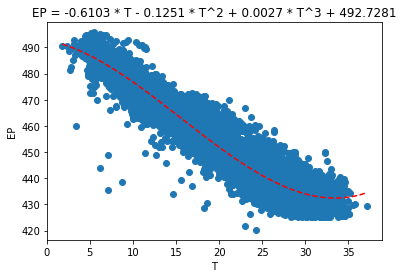

In [104]:
plt.scatter(ccpp_t, ccpp_y)
x_plot = np.arange(min(ccpp_t), max(ccpp_t), 0.01)
plt.plot(x_plot, tquad_result.params[0] + x_plot * tquad_result.params[1] + np.power(x_plot, 2) * tquad_result.params[2] + np.power(x_plot, 3) * tquad_result.params[3], 'r--')
plt.xlabel("T")
plt.ylabel("EP")
plt.title("EP = -0.6103 * T - 0.1251 * T^2 + 0.0027 * T^3 + 492.7281") 
plt.show()

Observation:
- evidence of non-linear asociation between the predictor, Temperature (T), and response variable, EP exists 
    - The p values for all the terms are less than the rejection region, 0.05, in which we reject the null hypothesis. Thus, all terms are statistically significant. 
    - as R^2 value for non-linear, polynomial model is higher than the R^2 value for the univariate simple linear regression (0.912 > 0.899) 
    - the overall line fits the data points well and better than the univariate model. 

    ii) Vacuum (V)

In [85]:
vquad_result = smf.ols('EP ~ V + np.power(V, 2) + np.power(V, 3)', data = ccpp_data).fit()
print(vquad_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:30:49   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        554.1468      9.151     60.

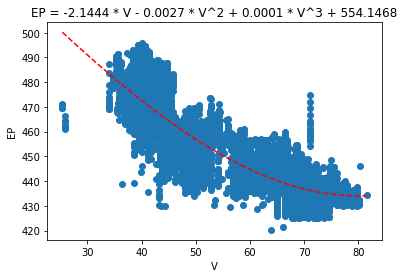

In [103]:
plt.scatter(ccpp_v, ccpp_y)
x_plot = np.arange(min(ccpp_v), max(ccpp_v), 0.01)
plt.plot(x_plot, vquad_result.params[0] + x_plot * vquad_result.params[1] + np.power(x_plot, 2) * vquad_result.params[2] + np.power(x_plot, 3) * vquad_result.params[3], 'r--')
plt.xlabel("V")
plt.ylabel("EP")
plt.title("EP = -2.1444 * V - 0.0027 * V^2 + 0.0001 * V^3 + 554.1468") 
plt.show()

Observation:
- evidence of non-linear asociation between the predictor, Vacuum (V), and response variable, EP exists 
    - The p values for all the terms excpet for quadratic (squared term) term is less than the rejection region, 0.05, in which we reject the null hypothesis. Thus, all terms except quadratic are statistically significant. 
    - Quadratic term's p-value tells us that the term is not statistically significant. 
    - as R^2 value for non-linear, polynomial model is slightly higher than the R^2 value for the univariate simple linear regression (0.775 > 0757) 
    - If we were to remove the outliers, it could give possibly give us a better model, but it might overfit the test data. 

    iii) Ambient Pressure (AP)

In [86]:
apquad_result = smf.ols('EP ~ AP + np.power(AP, 2) + np.power(AP, 3)', data = ccpp_data).fit()
print(apquad_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:31:24   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0747      0.009     

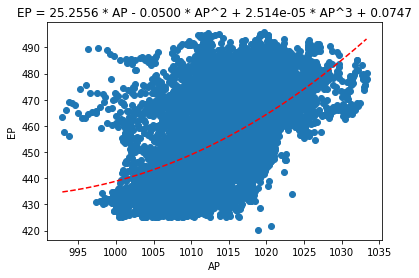

In [105]:
plt.scatter(ccpp_ap, ccpp_y)
x_plot = np.arange(min(ccpp_ap), max(ccpp_ap), 0.01)
plt.plot(x_plot, apquad_result.params[0] + x_plot * apquad_result.params[1] + np.power(x_plot, 2) * apquad_result.params[2] + np.power(x_plot, 3) * apquad_result.params[3], 'r--')
plt.xlabel("AP")
plt.ylabel("EP")
plt.title("EP = 25.2556 * AP - 0.0500 * AP^2 + 2.514e-05 * AP^3 + 0.0747") 
plt.show()

Observation:
- evidence of non-linear asociation between the predictor, Ambient Pressure (AP), and response variable, EP exists 
    - The p values for all the terms are less than the rejection region, 0.05, in which we reject the null hypothesis. Thus, all terms are statistically significant. 
    - as R^2 value for non-linear, polynomial model is slightly higher than the R^2 value for the univariate simple linear regression (0.275 > 0.269). Not a big increase, and it does not convey a whole lot of information. 

    iv) Relative Humidity (RH)

In [87]:
rhquad_result = smf.ols('EP ~ RH + np.power(RH, 2) + np.power(RH, 3)', data = ccpp_data).fit()
print(rhquad_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:31:49   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         468.4135     10.545     

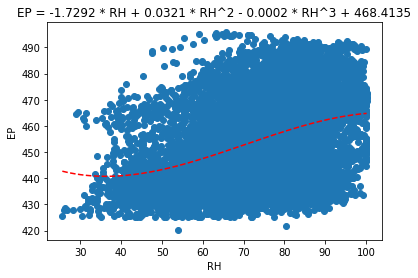

In [106]:
plt.scatter(ccpp_rh, ccpp_y)
x_plot = np.arange(min(ccpp_rh), max(ccpp_rh), 0.01)
plt.plot(x_plot, rhquad_result.params[0] + x_plot * rhquad_result.params[1] + np.power(x_plot, 2) * rhquad_result.params[2] + np.power(x_plot, 3) * rhquad_result.params[3], 'r--')
plt.xlabel("RH")
plt.ylabel("EP")
plt.title("EP = -1.7292 * RH + 0.0321 * RH^2 - 0.0002 * RH^3 + 468.4135") 
plt.show()

Observation:
- evidence of non-linear asociation between the predictor, Ambient Pressure (AP), and response variable, EP exists 
    - The p values for all the terms are less than the rejection region, 0.05, in which we reject the null hypothesis. Thus, all terms are statistically significant. 
    - as R^2 value for non-linear, polynomial model is slightly higher than the R^2 value for the univariate simple linear regression (0.154 > 0.152). Not a big increase, and it does not convey a whole lot of information

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [116]:
interaction_result = smf.ols(formula='EP~ T*AP + T*RH + T*V + AP*RH + AP*V + RH*V', data=ccpp_data).fit()
print(interaction_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:38:20   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Observations: 
- There is evidnce of association of interactions of predictors: 
    - Interaction of Temperature (T) and Relative Humidity (RH) p-value is less than rejection region of 0.05, saying it is statistically significant. 
    -  Interaction ofTemperature (T) and Vacuum (V) p-value is less than rejection region of 0.05, saying it is statistically significant. 
    - Interaction of Ambient Pressure (AP) and Relative Humidity (RH) p-value is less than rejection region of 0.05, saying it is statistically significant. 
    - Interaction of Ambient Pressure (AP) and Vacuum (V) p-value is less than rejection region of 0.05, saying it is statistically significant. 

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

    (1) Regression Model With All Predictors

In [153]:
ccpp_data_copy = ccpp_data.copy() 
train, test = train_test_split(ccpp_data_copy, test_size=0.3) # takes care of dividing the dataset and shuffling

model_1 = smf.ols(formula='EP ~ T + AP + RH + V', data=train).fit()
pred_train_1 = model_1.predict(train[['T', 'AP', 'RH', 'V']]) 
pred_test_1 = model_1.predict(test[['T', 'AP', 'RH', 'V']])

print(model_1.summary())
print('')
print('All variables are significant.')
train_error_1 = metrics.mean_squared_error(train['EP'], pred_train_1)
test_error_1 = metrics.mean_squared_error(test['EP'], pred_test_1)
print("MSE Train for Regresion Model: " + str(train_error_1))
print("MSE Test for Regresion Model: " + str(test_error_1))

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.203e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:50:28   Log-Likelihood:                -19619.
No. Observations:                6697   AIC:                         3.925e+04
Df Residuals:                    6692   BIC:                         3.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    456.7735     11.550     39.546      0.0

    (2) Regression Model involving all possible interaction terms and quadratic nonlinearities

In [163]:
model_2 = smf.ols(formula='EP~ AP + T + RH + V + T*RH + T*V + T*AP + AP*RH + AP*V + V*RH + T*V*AP + T*V*RH + T*RH*AP + AP*RH*V + AP*T*V*RH + np.power(V, 2) + np.power(T, 2) + np.power(AP, 2) + np.power(RH, 2)', data=train).fit()
print(model_2.summary())
print('')

print("Remove V^2 since p-value is higher than the rejection region, 0.05. Not a significant term.")
print('')
pred_train_2 = model_2.predict(train[['T', 'AP', 'RH', 'V']]) 
pred_test_2 = model_2.predict(test[['T', 'AP', 'RH', 'V']])

train_error_2 = metrics.mean_squared_error(train['EP'], pred_train_2)
test_error_2 = metrics.mean_squared_error(test['EP'], pred_test_2)

print("MSE Train for Regresion Model with all Possible Interaction and Quadratic Nonlinearities: " + str(train_error_2))
print("MSE Test for Regresion Model with all Possible Interaction and Quadratic Nonlinearities: " + str(test_error_2))

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5542.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:15:47   Log-Likelihood:                -19054.
No. Observations:                6697   AIC:                         3.815e+04
Df Residuals:                    6677   BIC:                         3.828e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4394.4423   1676.880     

    (3) Regression Model with ONLY SIGNIFICANT Interaction and Quadratic Nonlinearities

In [164]:
model_3 = smf.ols(formula='EP~ AP + T + RH + V + T*RH + T*V + T*AP + AP*RH + AP*V + V*RH + T*V*AP + T*V*RH + T*RH*AP + AP*RH*V + AP*T*V*RH + np.power(T, 2) + np.power(AP, 2) + np.power(RH, 2)', data=train).fit()
print(model_3.summary())
print('')

pred_train_3 = model_3.predict(train[['T', 'AP', 'RH', 'V']]) 
pred_test_3 = model_3.predict(test[['T', 'AP', 'RH', 'V']])

train_error_3 = metrics.mean_squared_error(train['EP'], pred_train_3)
test_error_3 = metrics.mean_squared_error(test['EP'], pred_test_3)

print('All variable are significant.')
print('')
print("MSE Train for Regresion Model with ONLY SIGNIFICANT Interaction and Quadratic Nonlinearities: " + str(train_error_3))
print("MSE Test for Regresion with ONLY SIGNIFICANT Interaction and Quadratic Nonlinearities: " + str(test_error_3))

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5849.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:16:15   Log-Likelihood:                -19055.
No. Observations:                6697   AIC:                         3.815e+04
Df Residuals:                    6678   BIC:                         3.828e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4291.1484   1674.430     

(i) KNN Regression:

    i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

    (1) Raw features:

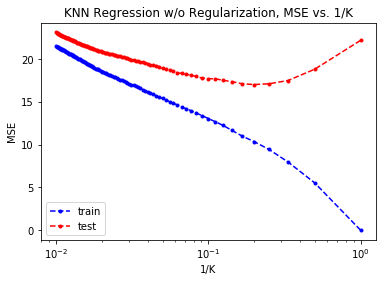

In [219]:
X_train = train[['T', 'AP', 'RH', 'V']]
y_train = train['EP']
X_test = test[['T', 'AP', 'RH', 'V']]
y_test = test['EP']
train_errors = []
test_errors = []

kvals = range(1, 101)
for k in kvals:
    knnReg = KNeighborsRegressor(n_neighbors=k)
    knnReg.fit(X_train, y_train)
    train_pred = knnReg.predict(X_train)
    train_errors.append(np.mean(np.power((y_train - train_pred),2)))
    test_pred = knnReg.predict(X_test)
    test_errors.append(np.mean(np.power((y_test - test_pred), 2)))

inverse_k = 1. / np.array(kvals)
plt.title('KNN Regression w/o Regularization, MSE vs. 1/K')
plt.xlabel('1/K')
plt.ylabel('MSE')
plt.plot(inverse_k, train_errors, color='blue',ls='dashed', marker='.', label='train')
plt.plot(inverse_k, test_errors, color='red', ls='dashed', marker='.', label='test')
plt.xscale('log')
plt.legend()
plt.show()

In [220]:
best_k = np.argmin(test_errors) + 1
print("K = " + str(best_k) + ", which is the point of minimum test error of, " + str(test_errs[best_k-1]))

K = 5, which is the point of minimum test error of, 16.054354410309998


    (2) Normalized features: 

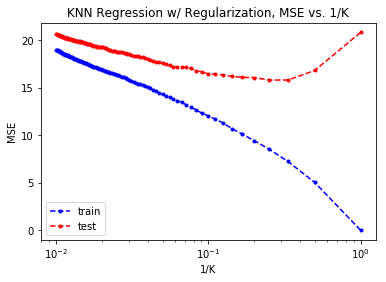

In [217]:
# combine dataset for normalization 
combine = [train, test]
combined = pd.concat(combine)

# remember the split of dataset for train and test since we want to compare the models on the same test dataset
# train, until 6697 (length 6697) by using len(train)
# test, after 6697 (length 2871) by using len(test)

scaler = StandardScaler()
scaler.fit(combined.drop('EP', axis = 1))
scaled_features = scaler.transform(combined.drop('EP', axis = 1))

df_normalized = pd.DataFrame(scaled_features, columns = combined.columns[:-1])

X_train_normalized = df_normalized.iloc[:6697]
X_test_normalized = df_normalized.iloc[6697:]

train_errors = []
test_errors = []

list_k = range(1, 101)
for k in list_k:
    knnReg = KNeighborsRegressor(n_neighbors=k)
    knnReg.fit(X_train_normalized, y_train)
    train_pred = knnReg.predict(X_train_normalized)
    train_errors.append(np.mean(np.power((y_train - train_pred),2)))
    test_pred = knnReg.predict(X_test_normalized)
    test_errors.append(np.mean(np.power((y_test - test_pred), 2)))

inverse_k = 1. / np.array(list_k)
plt.title('KNN Regression w/ Regularization, MSE vs. 1/K')
plt.xlabel('1/K')
plt.ylabel('MSE')
plt.plot(inverse_k, train_errors, color='blue',ls='dashed', marker='.', label='train')
plt.plot(inverse_k, test_errors, color='red', ls='dashed', marker='.', label='test')
plt.xscale('log')
plt.legend()
plt.show()

In [218]:
best_k = np.argmin(test_errors) + 1
print("K = " + str(best_k) + ", which is the point of minimum test error of, " + str(test_errs[best_k-1]))

K = 4, which is the point of minimum test error of, 15.790041196447227


(j) Compare the results of KNN Regression with linear regression and provide your analysis.

- In comparing the test error, KNN Regression seems to be better than linear regression from part (e) model 3 as KNN Regression gives a lower test error. 
- This is due to KNN Regression being a more flexible method than linear regression.
- In particular, when the features are normalized for KNN Regression, it achieves the lowest test error compared to the KNN Regression w/o the features being normalized. Normalization helps to build a better model in this case. 
- Overall, the Best MSE ranking, from lowest to greatest: KNN w/ Regularization < KNN w/o Regularization < Linear Regression Part (e) Model 3

2.ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.
- Flexible is better since for a large sample size, n, and a small number of preditors, p, samples are more likely to span the space of predictors, so a more flexible method fits better. 

(b) The number of predictors p is extremely large, and the number of observations n is small.
- Flexible model is worse since for large p, and small number of obervations, n, it will overit the data/ 

(c) The relationship between the predictors and response is highly non-linear.
- Flexible is better than the inflexible model since a flexible model can fit the data with more degrees of freedom. Since the relationship between predictors and response variable is highly non-linear, a flexible model is a better method. 

(d) The variance of the error terms, i.e. σ^2 = Var(ε), is extremely high
- Flexible model is worse, as the variance is high, the flexible model will fit the errors closely and it could overfit the data, giving poor results. 

3.ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

Obs. X1 X2 X3 Y

1 0 3 0 Red

2 2 0 0 Red

3 0 1 3 Red

4 0 1 2 Green

5 −1 0 1 Green

6 1 1 1 Red


Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

In [107]:
islr247 = pd.DataFrame([[0,3,0,'Red'],
                   [2,0,0,'Red'],
                   [0,1,3,'Red'],
                   [0,1,2,'Green'],
                   [-1,0,1,'Green'],
                   [1,1,1,'Red']],
                  index=[1,2,3,4,5,6],
                  columns=['X1','X2','X3','Y'])

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [115]:
obs1_dist = math.sqrt(np.power(islr247.iloc[0][0],2) + np.power(islr247.iloc[0][1],2) + np.power(islr247.iloc[0][2],2))
obs2_dist = math.sqrt(np.power(islr247.iloc[1][0],2) + np.power(islr247.iloc[1][1],2) + np.power(islr247.iloc[1][2],2))
obs3_dist = math.sqrt(np.power(islr247.iloc[2][0],2) + np.power(islr247.iloc[2][1],2) + np.power(islr247.iloc[2][2],2))
obs4_dist = math.sqrt(np.power(islr247.iloc[3][0],2) + np.power(islr247.iloc[3][1],2) + np.power(islr247.iloc[3][2],2))
obs5_dist = math.sqrt(np.power(islr247.iloc[4][0],2) + np.power(islr247.iloc[4][1],2) + np.power(islr247.iloc[4][2],2))
obs6_dist = math.sqrt(np.power(islr247.iloc[5][0],2) + np.power(islr247.iloc[5][1],2) + np.power(islr247.iloc[5][2],2))

distance = [obs1_dist, obs2_dist, obs3_dist, obs4_dist, obs5_dist, obs6_dist]
islr247['distance'] = distance
islr247.head(6)

,X1,X2,X3,Y,distance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


(b) What is our prediction with K = 1? Why?
- Green; As observation 5 has the smallest distance from the test point, X1 = X2 = X3 = 0 and we only consider one neighbor, the closest neighbor and it votes for green.

(c) What is our prediction with K = 3? Why?
- Red since looking at three nearest neighbor for the test point, X1 = X2 = X3 = 0, 
    - Observation 5: vote Green (1st nearest neighbor) 
    - Observation 6: vote Red (2nd nearest neighbor)
    - Observation 2: vote Red (3rd nearest neighbor)
    - Overall #Red (2) > #Green (1) 
    - So, Red is selected 

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
- It is expected that K is small for the decision boundary to be highly nonlinear. This is because smaller values of K for KNN is a more flexible model and has a more flexible decision boundary. 